# Tables de Hashage

Une table de hashage est une structure de données efficace pour répondre à un problème de *dictionnaire* : Il s'agit d'avoir un ensemble de couples clé/valeur que l'on veut pouvoir gérer, en en créant de nouveaux, les supprimant, et en pouvant facilement retrouver les couples stockès à partir de leur clés. Les clés sont distinctes, si deux couples clé/valeur sont stockés, leurs clés sont différentes. On souhaite donc réaliser les requêtes :

* insérer(clé, valeur) : ajouter un nouveau couple
* supprimer(clé) : supprimer le couple correspondant à la clé fournie s'il existe
* rechercher(clé) : déterminer si un couple possède cette clé, et fournir la valeur associée

In [1]:
#Librairies utilisées pour ce cours

%matplotlib inline

import matplotlib.pyplot as plt
import time
import numpy as np
import math
import random
import string

In [2]:
# Fonctions utilitaires pour des courbes et de l'aléatoire, peu important

def plot_array(array, log = False):
    if log:
        plt.semilogy(array)
    else:
        plt.plot(array)
    plt.show()

def perf(f, input, trials=10):
    res = []
    for i in input:
        t = time.time()
        for j in range(trials):
            f(*i)
        res.append((time.time() - t)/trials)
    return np.array(res)

def char_index(c):
    return ord(c) - ord('a')

def rand_word(l):
    letters = string.ascii_lowercase
    return "".join(random.choice(letters) for i in range(l))

## Dictionnaire

Le dictionnaire est un livre permettant de répondre à un problème de ... dictionnaire. Dans cet exemple les *clés* sont les mots, et les *valeurs* sont les définitions qui leur sont associées. Un dictionnaire est efficace pour déterminer, étant donné un mot, quelle est sa définition. À partir d'une clé, vous êtes en mesure de récupérer efficacement la valeur associée.

<center>
    <img style="margin-top : 5mm;" src="dictionnaire.jpg"/>
</center>



### Complexité

Un dictionnaire n'est pas un livre fait pour être édité. Vous n'avez pas particulièrement la possibilité de rajouter vos propres définitions, à moins de contacter les auteurs et de refaire imprimer le livre. Ce choix est visible dans les complexités correspondantes. Pour modélser informatiquement le dictionnaire, le plus proche est le *tableau trié* : les notes et leurs définition sont rangées côte à côte, sans espace entre elles. Le tableau offre une capacité que le livre n'a pas, si nous cherchions la 243ième définition, le tableau nous la fournit en temps constant, alors qu'avec le livre c'est plus délicat.

In [3]:
# Un petit dictionnaire de test avec des mots et des définitions aléatoires

test_dico = sorted([(rand_word(5), rand_word(20)) for i in range(20)])
test_dico

[('aidqj', 'kvdiepsvtvubfnxqixyl'),
 ('bxaxo', 'jrxsxvbtyisvdkfxfkql'),
 ('ipjcs', 'nbfurynykmkjpxofwjjr'),
 ('iydsa', 'enqkcnvcxzbduzlfxyde'),
 ('ksoql', 'ebcgfgkvdzhvjpidegbw'),
 ('lzchl', 'rbdpplkcoclxrnyyvijm'),
 ('nbxfb', 'hlvuitsdywkdjdkqtqws'),
 ('nwjnc', 'llueqsymgazlyjjmroub'),
 ('opxdi', 'cpraovlbzveuudntjmhk'),
 ('oulxp', 'ariwymzqwnddypuflbca'),
 ('qybdz', 'ujjotuwaocysabywnyel'),
 ('ridsz', 'ljyczbhmwplwxitryhaj'),
 ('sgqca', 'ldxngqduzfxpcffkmuan'),
 ('tyqvw', 'totajxjxzphgbmzfmfwi'),
 ('xhpnn', 'oibhdcjoibdknyknxaoc'),
 ('xnkeh', 'sribekjjpqiuuqpqkxdn'),
 ('xqfvq', 'rntzkbkfxmgsxjckakde'),
 ('xyxiu', 'cevgvohnalagtyheoufm'),
 ('zbktw', 'tssbbvvvuttnuvjxanlh'),
 ('zsidg', 'aewpukhxxvblerhbvhnl')]

#### Rechercher

La recherche dans un tableau trié se fait en utilisant la *dichotomie*. Si le tableau contient $n$ couples, triés par clé, la recherche sera réalisée en $O(\log{n})$ opérations élémentaires.

In [4]:
# Recherche dans un tableau trié par dichotomie

def dico_recherche(dico, mot):
    debut = 0
    fin = len(dico)
    while fin > debut:
        milieu = int((debut + fin) / 2)
        if dico[milieu][0] == mot:
            return dico[milieu][1]
        if dico[milieu][0] > mot:
            fin = milieu
        else:
            debut = milieu + 1
    return None

In [5]:
# Test de recherche d'une clé aléatoire

print(dico_recherche(test_dico, rand_word(5)))

# Test de recherche d'une clé présente

print(dico_recherche(test_dico, test_dico[2][0]))

None
nbfurynykmkjpxofwjjr


In [6]:
# Une série de 1000 tableaux triés de tailles croissante de 1 à 1000 et de clés à chercher

dico_inputs = [
    (
        sorted([(rand_word(20), rand_word(100)) for i in range(t)]), # le tableau
        rand_word(20) # la clé à chercher dedans
    ) for t in range(1000) # pour toutes les tailles de 1 à 1000
]

In [7]:
# Test de performance

dico_recherche_perf = perf(dico_recherche, dico_inputs, 1000)

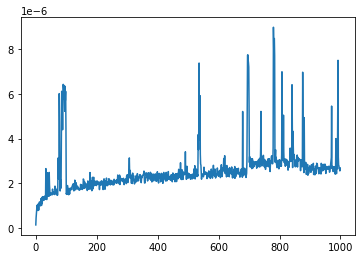

In [8]:
# Tracé

plot_array(dico_recherche_perf)

On voit bien ici aparaître le comportement logarithmique sur la recherche.

#### Supprimer

Un dictionnaire ne contient pas de blanc. De même dans un tableau les valeurs soivent rester contiguës. Lorsqu'une valeur est supprimée, dans la mesure où le dictionnaire doit rester trié, il est nécessaire de décaler toutes les valeurs, ce qui prendra en moyenne et dans le pire des cas $O(n)$ opérations élémentaires. Je vous laisse l'implémentation en exercice.

#### Insérer

Comme la suppression, étant donné qu'il faut préserver l'ordre, pour insérer un nouveau couple clé/valeur, il faut identifier sa place (ce qui correspond à une recherche), puis tout décaler pour faire une place. La complexité est donc également $O(n)$ opérations élémentaires. De même je vous laisse l'implémentation.

## Répertoire

L'objet est probablement désuet de nos jours, mais il fut un temps ou les écoliers utilisaient des répertoires, et il y en avait toujours un à côté du téléphone fixe pour noter les numéros de téléphones de ses connaissances. On a bien ici à nouveau un problème de dictionnaire, les clés étant les noms des personnes, et les valeurs leurs coordonnées. Le cahier est par contre conçu pour évoluer dans le temps, et prend donc en compte la possibilité d'ajouter de nouveaux contacts.

<center>
    <img style="margin-top : 5mm;"src="repertoire.jpg">
</center>

Les pages d'un tel cahier sont munies à droite d'encoches avec toutes les lettres de l'alphabet. En posant le doigt sur l'encoche, on peut insérer son doigt entre les pages et accéder directement à la partie du cahier correspondant à la lettre.

L'utilisation d'un répertoire pour ses contacts consiste à prendre la première lettre du nom du contact à ajouter, se rendre dans la partie du répertoire correspondant, puis à ajouter la personne au premier endroit disponible.

### Complexité

La recherche, l'insertion et la suppression dans le répertorie se font en deux parties. D'abord on utilise l'encoche, ensuite on cherche dans la zone ouverte par l'encoche. Utiliser l'encoche est rapide, on peut assimiler l'opération à un temps constant. La recherche dans la zone par contre est plus longue : en l'absence d'ordre dans les éléments rangés, la recherche doit se faire linéairement sur les valeurs stockées. En terme de structures de données, on peut modéliser ce comportement en considérant que le répertoire est un tableau de 26 tableaux dynamiques.

In [9]:
# Un répertoire vide

repertoire = [[] for i in range(26)]
repertoire

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

#### Insertion

Si nous savons que le contact n'est pas dans le répertoire, nous pouvons simplement nous rendre dans la zone, et l'ajouter à la fin des éléments stockés. Dans le cas où il faut d'abord vérifier l'existence, il faut aujouter la complexité d'une recherche.

In [10]:
# Insertion. Attention, il faudrait vérifier les doublons

def repertoire_inserer(rep, nom, coord):
    index = char_index(nom[0])
    rep[index].append((nom, coord))

In [11]:
# Test sur une petite table

for i in range(20):
    repertoire_inserer(repertoire, rand_word(5), rand_word(20))
repertoire

[[('awfid', 'bakbavhbzxrwwilipbar')],
 [],
 [],
 [('drnhx', 'ekdpgkqbdkuveahwetth')],
 [('eyrwr', 'fpejrbnkmgambfjobxsz'), ('ehviq', 'syetmilstasgdvlwcuej')],
 [],
 [],
 [('hnnqx', 'gypjwsjuxqsisofmwsek')],
 [('ivwrk', 'nmserfwskcyzpmzxlvmt')],
 [],
 [('kwajp', 'uwjfdmycyvipilntdzkz')],
 [('lrpcr', 'aokxaqidlxpthzfjkfig')],
 [],
 [],
 [],
 [],
 [],
 [],
 [('sqytz', 'wnfdrzletarxuyaokidv'),
  ('sdoog', 'pvawmlkvqxniveibkelu'),
  ('sjuwe', 'dioxdijufteoluizlyes')],
 [],
 [],
 [('vfosz', 'psgywbkmdczrvfncytjy'), ('vbbtu', 'pxdmyqqnttyjmtlcsjfr')],
 [('wgvao', 'erezphmtrhgkowvcjxnu'),
  ('wkmuv', 'oozisicfsgcakbdotyst'),
  ('wxgsl', 'zqgvhquikbobffmuuupz'),
  ('wvgbr', 'zupoibdjsqpuetwwjqxr')],
 [('xfyrz', 'cqbjerqwobgahurcjyls')],
 [('yaymv', 'snwwzluneftugjkdwchc'), ('ydntv', 'lzxvxcepxiasxnzlcxbw')],
 []]

#### Recherche

On a d'abord l'utilisation de l'encoche, qui est en $\Theta(1)$ puis la recherche linéaire dans la zone. Si k est le nombre de valeurs dans la zone, on est donc en $O(k)$ opérations élémentaires. Si on suppose que les $n$ contacts sont répartis équitablement entre les lettres, alors on a $k = \Theta(n)$ donc la recherche est linéaire.

In [12]:
def repertoire_recherche(rep, nom):
    index = char_index(nom[0])
    for n,a in rep[index]:
        if n == nom:
            return a

In [13]:
# Test d'une recherche probablement infructueuse

print(repertoire_recherche(repertoire, rand_word(5)))

# Test d'une recherche fructueuse

repertoire_inserer(repertoire, "nom", "exemple")
print(repertoire_recherche(repertoire, "nom"))

None
exemple


In [14]:
# Ensemble d'entrées pour tester les performances

repertoire_inputs = []
for n in range(1000):
    r = [[] for i in range(26)]
    for i in range(n):
        repertoire_inserer(r, rand_word(5), rand_word(20))
    repertoire_inputs.append((r[:], rand_word(5)))


In [15]:
repertoire_perfs = perf(repertoire_recherche, repertoire_inputs)

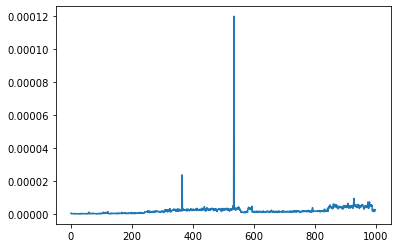

In [16]:
plot_array(repertoire_perfs)

On voit ici apparaître le comportement linéaire.

#### Suppression

En connaissant la position dans le cahier de l'entrée à supprimer, on peut réaliser la suppression en temps constant : il suffit de gommer l'entrée, puis de recopier la dernière entrée de la zone à l'emplacement libéré, et enfin de gommer cette dernière de la fin de la zone. Sans savoir où se trouve la valeur à supprimer, il faut commencer par la trouver, et ainsi payer le coût linéaire de la recherche.

### Remarques

#### À propos de la répartition des valeurs

Dans le pire des cas, toux vos amis s'appellent Ninon, et toutes les entrées sont concentrées dans la même zone. Le répertoire dégénère en une simple liste de vos contacts sans ordre particulier.

#### À propos du nombre d'encoches

La complexité de la recherche est linéaire en le nombre d'éléments présents dans la même zone. En se basant sur autant de zones que de lettres de l'alphabet, on arrive à 26 zones, et si $n$ est le nombre total d'éléments dans le répertoire, on a en moyenne $\frac{n}{26}$ entrées par zone. Ce $\frac{n}{26}$ correspond à la pente de la droite correspondant à la complexité ci-dessus. Pour un vrai répertoire, 26 zones c'est bien. Mais du point de vue de l'implémentation, on pourrait tout à fait faire plus de zones, par exemple en utilisant les deux premières lettres au lieu de simplement la première. On aurait alors $26^2 = 676$ zones dans le répertoire.

In [17]:
# Nouvelle version d'un répertoire sur les deux premières lettres

def repertoire2_inserer(rep, nom, coord):
    index = 26 * char_index(nom[1]) + char_index(nom[0])
    rep[index].append((nom, coord))
    
def repertoire2_recherche(rep, nom):
    index = 26 * char_index(nom[1]) + char_index(nom[0])
    for n,a in rep[index]:
        if n == nom:
            return a

In [18]:
# Nouveau je d'entrées pour les performances

repertoire2_inputs = []
for n in range(2000):
    r = [[] for i in range(26*26)]
    for i in range(n):
        repertoire2_inserer(r, rand_word(5), rand_word(20))
    repertoire2_inputs.append((r[:], rand_word(5)))

In [19]:
repertoire2_perfs = perf(repertoire2_recherche, repertoire2_inputs)

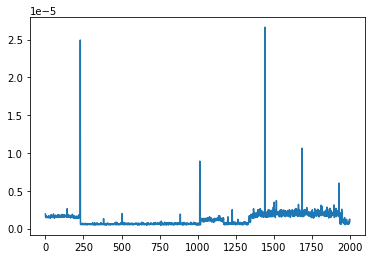

In [20]:
plot_array(repertoire2_perfs)

La pente devient ici presque impreceptible, car pour 1000 valeurs dans 676 zones, on ne voit encore pas trop apparaître le côté linéaire. Et c'est là qu'on commence à rentrer dans le vif du sujet : que se passe-t-il lorsque le nombre de zones devient proportionel au nombre de valeurs stockées ? Cette fois, lorsqu'on fait le ratio pour obtenir le nombre moyen d'éléments par zone, les $n$ s'annulent, et on obtient une constante !

## Tables de hashage

Les tables de hashage formalisent la notion de répertoire en introduisant une notion intermédiaire : le *hashage*. Dans la librairie standard du C++ elles sont proposées sous le nom `unordered_map`.Dans l'exemple précédent, le hashage était réalisé en extrayant du nom de la personne la première lettre, ou les deux premières lettres. On a donc désormais trois termes :

* la clé : l'élément par lequel on identifie les données ;
* la valeur : la donnée associée à la clé ;
* le hash : l'indice utilisé pour positionner les données dans la table.

Le hash est calculé à partir de la clé. Si $t$ est la taille de la table, une fonction de hashage est du type $h : \mbox{clé} \mapsto [0, t-1]$ qui a une clé associe un nombre . À noter que ce processus est **déterministe** c'est à dire que si on appelle plusieurs fois la fonction de hashage $h$ sur la même clé, on obtiendra toujours le même hash. Ça correspond bien à ce que nous faisions avec le répertoire en extrayant la première lettre du nom. On peut ainsi réécrire nos fonctions en intégrant cette notion.


In [21]:
# Fonction de hashage

def h(cle, taille):
    return 0 # cette fonction de hashage est pourrie

# Attention nous ne gérons toujours pas les doublons

def tableh_inserer(table, cle, valeur):
    index = h(cle, len(table))
    table[index].append((cle, valeur))
    
def tableh_rechercher(table, cle):
    index = h(cle, len(table))
    for n,a in table[index]:
        if n == cle:
            return valeur

In [22]:
tableh = [[] for i in range(20)]

In [23]:
# Illustration de la fonction de hashage la plus stupide

for i in range(20):
    tableh_inserer(tableh, rand_word(5), rand_word(20))
tableh

[[('fbjlq', 'qckktnhjrnkuqznwcvpq'),
  ('ggygp', 'pqwnchgeqmxyezwtzhwp'),
  ('egsnm', 'knvyucynzaavwbffnwso'),
  ('osutv', 'tzwfixhynwgqkombwhcd'),
  ('ijzei', 'zqbkemnqcwzisixxgkzk'),
  ('pdfzi', 'qvelrjhtadktkijkfswg'),
  ('ftnlw', 'oqsmnkqwvomscekjqckk'),
  ('plfny', 'rbvzxhskkcgxvvgsyyze'),
  ('hewtr', 'qncktbnlforwhdiriwxj'),
  ('dgcrq', 'igycxzcstlfsqqbfyatu'),
  ('flhiu', 'brozzdlznoyoznxowtcg'),
  ('dpugj', 'vkmgzkxxphjyeqlgeege'),
  ('ageru', 'ehxbmxeuebrkdsumfott'),
  ('pbeer', 'zxjhrrydlclzqimzkmee'),
  ('tnxlq', 'yaagouudzqjfbxiublni'),
  ('hosgz', 'kjnwkrdzsqqnuokfiovy'),
  ('vqlfp', 'ojjjhqgxwheqrxtfxaix'),
  ('dbxhi', 'hwmgskbcoisbrxrfdovr'),
  ('kqabn', 'zmncmtpqddhrqcpikacg'),
  ('gzseh', 'tbrfsexwvpqmrpcefcpy')],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

La fonction de hashage utilisée ici était clairement mauvaise car elle a envoyé toutes les données dans la première case de la table, et rien dans les autres. Le choix d'une fonction de hashage dépend des clés que vous utiliserez.

### Fonction de hashage

Il existe une vaste littérature sur la définition de fonctions de hashage ([quelques exemples ici](https://opendsa-server.cs.vt.edu/ODSA/Books/CS3/html/HashFuncExamp.html#)). Le principe est globalement d'éviter les *collisions*. Deux clés sont en collisions si elles sont différentes mais ont le même hash. On ne peut pas particulièrement prévoir l'ensemble de clés qui sera fourni, mais on essaie de ne pas aténuer leur diversité. Une bonne pratique consiste donc à s'assurer qu'on utilise tous les bits de la clé, et non seulement une partie, car sinon on perd la diversité liée aux bits qu'on a ignorés. Il faut également s'assurer que la plage de résultats $[0, t-1]$ reçoit les données uniformément et qu'il n'y a pas de favoritisme pour certaines valeurs de hashage.

Par exemple :

In [24]:
# Hashage par les deux premières lettres

def h(cle, taille):
    index = char_index(cle[0]) + 26*char_index(cle[1])
    return index % taille

tableh = [[] for i in range(20)]
for i in range(20):
    tableh_inserer(tableh, rand_word(5), rand_word(20))
tableh

[[],
 [],
 [],
 [('jtaix', 'vlrwiwmvurhiibdhtjyb'), ('dasnr', 'ncegvulgniylnzaxkkkd')],
 [],
 [],
 [('uvuel', 'xeclivujyurcfdbinrqn')],
 [('xetlo', 'yyydpuqvebhikzfegcup')],
 [('cbnjt', 'prucuakuoafhgdbqmiro')],
 [],
 [('sccfp', 'bmegjqjzkhkkubpacklv'), ('mxwjw', 'hygwcboygcjimbfvxrmr')],
 [('dsarp', 'asilonpppyyvnqkpolgz')],
 [('ysqwr', 'twrrxebhflrgboutqkro')],
 [('zsogq', 'jayupldogouaslmxhbaq'),
  ('dzjss', 'macaftfzzclfhkgyomuw'),
  ('zsohh', 'arqchpdqjagnatdyxvyh')],
 [],
 [('leyac', 'sofkxatoeystwirsxacu'),
  ('jlfgo', 'mugqacwaekrjtmyueihd'),
  ('pkgcz', 'daktrulcygespimgtewj')],
 [('klabl', 'wnqbmhonltpcrtckdyed'), ('ctqxr', 'zwzdyovfiogsoicabyfm')],
 [('tnihc', 'qllymnczdwsdrldouzeu')],
 [('gcwle', 'dfvoswkjfqbkoocmornh')],
 [('nbjdu', 'qjhdlnhhyzazwbgnzbvz')]]

sur de petites tables, cette fonction de hashage semble correcte. Mais si on regarde le résultat sur une table plus grande

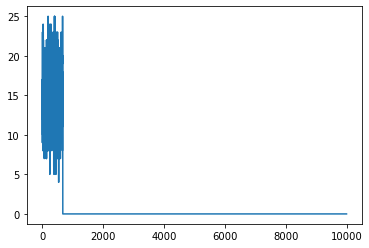

In [25]:
tableh = [[] for i in range(10000)]
for i in range(10000):
    tableh_inserer(tableh, rand_word(5), rand_word(20))
    
    
# on trace le nombre d'entrées dans chaque case de la table    
histogram = [len(t) for t in tableh]
plot_array(histogram)

On voit clairement que toute la table n'est pas utilisée car en réalité notre fonction de hashage ne renvoie que des valeurs entre 0 et 676.

In [26]:
# Hashage par somme des valeurs des lettres

def h(cle, taille):
    index = 0
    for c in cle:
        index += char_index(c)
    return index % taille

ici on utilise tous les caractères donc tous les bits de l'entrée.

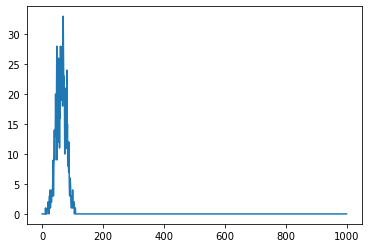

In [27]:
tableh = [[] for i in range(1000)]
for i in range(1000):
    tableh_inserer(tableh, rand_word(5), rand_word(20))
    
    
# on trace le nombre d'entrées dans chaque case de la table    
histogram = [len(t) for t in tableh]
plot_array(histogram)

De nouveau on a au maximum $5*26 = 130$ comme hash donc pour de grandes tables, ça ne peut pas fonctionner, alors même qu'avec des clés de 5 caractères on peut avoir 11 millions de clés différentes. De plus la distribution forme une gaussienne sur la plage non nulle, et n'est donc même pas uniforme sur cette plage.

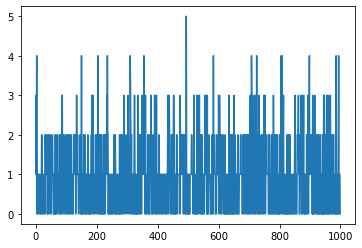

In [28]:
# Hashage par conversion en entier

def h(cle, taille):
    index = 0
    for c in cle:
        index *= 26
        index += char_index(c)
    return index % taille

tableh = [[] for i in range(1000)]
for i in range(1000):
    tableh_inserer(tableh, rand_word(5), rand_word(20))
    
    
# on trace le nombre d'entrées dans chaque case de la table    
histogram = [len(t) for t in tableh]
plot_array(histogram)

Ici on a transformé la chaine de caractères en un grand nombre, et on a pris le modulo. La distribution semble meilleure. Néanmoins si on perturbe légèrement l'entrée et que par hasard nos clés finissent toutes par un `a`, même si on en met beaucoup avec des clés plus grandes :

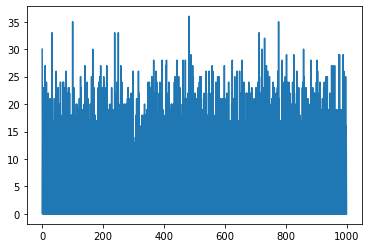

In [29]:
tableh = [[] for i in range(1000)]
for i in range(10000):
    tableh_inserer(tableh, rand_word(10) + "a", rand_word(20))
    
    
# on trace le nombre d'entrées dans chaque case de la table    
histogram = [len(t) for t in tableh]
plot_array(histogram)

a première vue rien d'anormal, mais en affichant de plus près l'histogramme pour les 20 premières cases de la table :

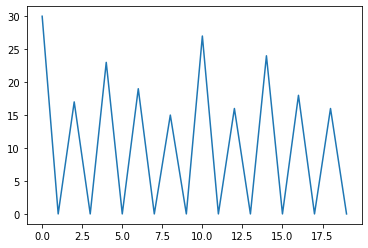

In [30]:
plot_array(histogram[:20])

on voit qu'en réalité, on n'utilise que la moitié de la table, et qu'une case sur deux est inutilisée :

In [31]:
tableh[:20]

[[('gewdebslnsa', 'qhvljmozskhzfwqqpqal'),
  ('rlharwqevka', 'wjfpslpqbhzxlfrasdmd'),
  ('hvwzaygdpca', 'ixswyypzolpdxaflxghq'),
  ('rnbgboyeaua', 'iluxsyajndhfjuvoihbp'),
  ('mfuvxhhucia', 'polqkhsdujouxcxmihpu'),
  ('aoyjbhrgzwa', 'tnxybuxbdygtdikclkug'),
  ('imryywxxoia', 'icddxetigjpadwmgndym'),
  ('faasjeogjka', 'rzkdetyeeswtpsozduyy'),
  ('wuqlnuqzyia', 'nrgepukpkvsmwcwpjkqx'),
  ('ptbwofvplca', 'wkubdzdziffkowbheqif'),
  ('jlwjcxtcbca', 'bpaaxdnfsjqhargvntlv'),
  ('wokxcotniaa', 'skegbyjhkubmopseuyes'),
  ('vcdqriprcya', 'nakdyiyzdiinanrenllx'),
  ('pvphrcibvsa', 'gnzlbpygsxixngeqynqe'),
  ('yudfuwblyua', 'hlwgrjweqwpaodrgxqkb'),
  ('megvyvfsvsa', 'knvdxxytfhfakhpqpexx'),
  ('yxcuqiaeqma', 'ceostqigwclmeiaogcnw'),
  ('vdzlbqezfoa', 'uitzhptcgfptdewzujui'),
  ('gsdolmuatwa', 'riztzkoanvfmjtrzromj'),
  ('wvvgaegqpoa', 'aeewrdrtgojdnxqvqkng'),
  ('osxpqmftmqa', 'wkqoldmpumfqxekanntz'),
  ('prylhpxewma', 'fzvyixlpmxmqjpgrecpt'),
  ('gyuocgmnyea', 'hzdoybdukzpbtwnbcgvw'),
  ('ldzuaha

Je vous laisse deviner pourquoi. En modifiant légèrement notre fonction de hashage :

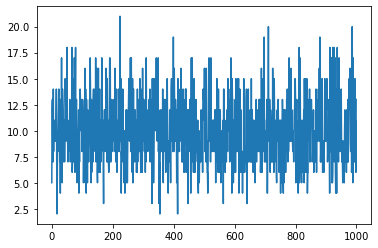

In [32]:
# Variante de la conversion en entier à l'aide d'un nombre premier

def h(cle, taille):
    index = 0
    for c in cle:
        index *= 31
        index += char_index(c)
    return index % taille

tableh = [[] for i in range(1000)]
for i in range(10000):
    tableh_inserer(tableh, rand_word(10)+"a", rand_word(20))
    
    
# on trace le nombre d'entrées dans chaque case de la table    
histogram = [len(t) for t in tableh]
plot_array(histogram)

On a a priori une distribution plutôt centrée sur 10 entrées par case, ce qui correspond au ratio $\frac{10000}{1000}$ entre le nombre d'entrées et la taille de la table.

### Adressage ouvert

Les collisions sont inévitables, et la probabilité de collision croît exponentiellement avec le nombre de clés, même avec uns bonne fonction de hashage. C'est la curiosité classique des anniversaires : sur une classe de 35 élèves, la probabilité d'avoir deux personnes ayant le même anniversaire est de l'ordre de 80% si on considère que chaque anniversaire est tiré uniformément sur les 365 jours de l'année. Dans ce qui précède, nous avons stocké toutes les données en collision dans la même case de la table. C'est la technique dite du chaînage : on les range les unes à côté des autres. Une autre variante consiste à tout stocker dans la table, en cherchant une autre case en cas de collision. C'est *l'adressage ouvert*. On parle alors de stratégie de *rehashage*. Dans ce cas la table est un simple tableau, c'est une des raisons pour lesquelles cette stratégie peut être appréciée. Attention par contre, dans cette variante, la suppression est plus compliquée à mettre en œuvre efficacement.

In [33]:
tableh = [None for i in range(1000)]

On définit alors une seconde fonction qui prend en paramètre la clé et le nmobre d'essais réalisés, et renvoie la prochaine case à tester : $rh : \mbox{clé}, \mbox{entier} \mapsto [0, t-1]$ En particulier lorsque le nombre d'essais est 0, nous avons alors $rh(\mbox{clé}, 0) = h(\mbox{clé})$.

In [34]:
# Table avec adressage ouvert

def h(cle, taille):
    index = 0
    for c in cle:
        index *= 31
        index += char_index(c)
    return index % taille

def rh(cle, taille, essais):
    return 0 # De nouveau cette fonction est idiote

# Attention on ne gère toujours pas les doublons

def tableh_inserer(table, cle, valeur):
    index = h(cle, len(table))
    essais = 1
    while essais < len(table) and table[index] != None:
        essais += 1
        index = rh(cle, len(table), essais)
    table[index] = (cle, valeur)
    
# La recherche doit suivre le même chemin que l'insertion
    
def tableh_rechercher(table, cle):
    index = h(cle, len(table))
    essais = 1
    # s'il y a une entrée avec une clé différente, on a pu avoir uns collision
    while essais < len(table) and table[index] != None and table[index][0] != cle:
        essais += 1
        index = rh(cle, len(table), essais)
    if table[index] != None and table[index][0] == cle:
        return table[index][1]

#### Rehashage linéaire

Dans cette stratégie, en cas de case occupée, on avance linéairement sur la table.

In [35]:
def rh(cle, taille, essais):
    return (h(cle, taille) + essais) % taille

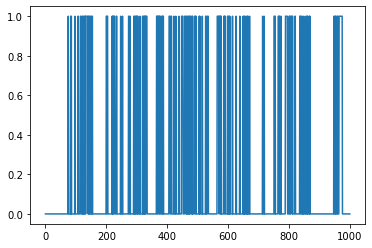

In [36]:
tableh = [None for i in range(1000)]

# Attention il ne faut pas utiliser plus d'entrées que la taille de la table.

for i in range(800):
    tableh_inserer(tableh, rand_word(5), rand_word(20))
    
    
# on trace les zones remplies de la table
histogram = [1 if t is None else 0 for t in tableh]
plot_array(histogram)

In [37]:
# Test d'une recherche probablement infructueuse

print(tableh_rechercher(tableh, rand_word(5)))

# Test d'une recherche fructueuse

tableh_inserer(repertoire, "nom", "exemple")
print(tableh_rechercher(repertoire, "nom"))

None
exemple


Cette stratégie de rehashage n'est pas très appréciée, car elle a tendance à créer des paquets dans la table, et chaque paquet se traduit par une recherche linéaire pour les clés qui en font partie.

#### Rehashage quadratique

Dans cette version on avance avec un pas de plus en plus grand dans la table pour éviter de créer de gros amas. Le pas est ici le carré du nombre d'essais, d'où le nom

In [38]:
def rh(cle, taille, essais):
    return (h(cle, taille) + essais*essais) % taille

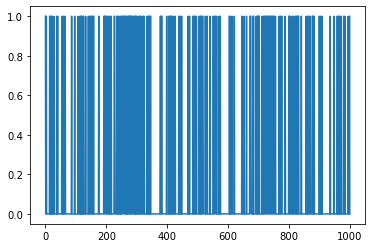

In [39]:
tableh = [None for i in range(1000)]

# Attention il ne faut pas utiliser plus d'entrées que la taille de la table.

for i in range(800):
    tableh_inserer(tableh, rand_word(5), rand_word(20))
    
    
# on trace les zones remplies de la table
histogram = [1 if t is None else 0 for t in tableh]
plot_array(histogram)

La répartition semble déjà montrer moins d'amas et de vides que le rehashage linéaire.

In [40]:
# Test d'une recherche probablement infructueuse

print(tableh_rechercher(tableh, rand_word(5)))

# Test d'une recherche fructueuse

tableh_inserer(repertoire, "nom", "exemple")
print(tableh_rechercher(repertoire, "nom"))

None
exemple


#### Double hashage

Le double hashage consiste à créer une nouvelle clé sur la base de l'essai et de la clé initiale, puis à hacher le tout avec une autre fonction de hashage, ici bricolée un peu au hasard.

In [41]:
def rh(cle, taille, essais):
    return ((h(cle, taille) + essais*35089) * 35527) % taille

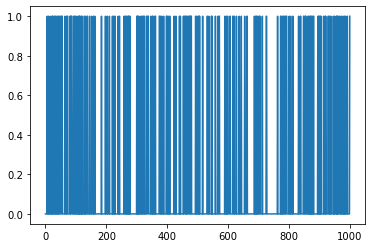

In [42]:
tableh = [None for i in range(1000)]

# Attention il ne faut pas utiliser plus d'entrées que la taille de la table.

for i in range(800):
    tableh_inserer(tableh, rand_word(5), rand_word(20))
    
    
# on trace les zones remplies de la table
histogram = [1 if t is None else 0 for t in tableh]
plot_array(histogram)

On constate ici des entrées qui semblent également étalées sur toute la table, mais il est difficile de voir si c'est mieux que pour le rehashage quadratique.

In [43]:
# Test d'une recherche probablement infructueuse

print(tableh_rechercher(tableh, rand_word(5)))

# Test d'une recherche fructueuse

tableh_inserer(repertoire, "nom", "exemple")
print(tableh_rechercher(repertoire, "nom"))

None
exemple


### Complexité

Appeler une fonction de hashage ou de rehashage a un coût constant. Lorsque les données sont bien réparties sur toute la longueur de la table, une table de hashage a alors les complexités moyennes suivantes :

* Insertion : $\Theta(1)$ ;
* Recherche : $\Theta(1)$ ;
* Suppression : $\Theta(1)$.

Il s'agit donc de la structure de données à privilégier pour les problèmes de dictionnaire.

## Alternatives

Une table de hashage nécessite de pouvoir *hasher* les clés. Sans fonction de hashage, on ne peut pas envisager de table. Lorsqu'il est possible de *comparer* deux clés pour déterminer laquelle est la plus grande, il est également possible d'utiliser des arbres binaires de recherche équilibrés ou des skip-lists qui fournissent les complexités :

* Insertion : $\Theta(\log{n})$ ;
* Recherche : $\Theta(\log{n})$ ;
* Suppression : $\Theta(\log{n})$.

Notez que si vous pouvez hasher les clés, vous pouvez les comparer, car ils suffit de comparer les hash des deux clés qui sont des entiers. En bonus, les arbres binaires de recherche et les skip-lists permettent d'avoir en permanence l'ensemble des entrées triées. Dans la librairie standard, vous trouverez les arbres équilibrés sous l'appellation `map`.